In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data = pd.read_csv(r'E:\Datasets\P39-Financial-Data.csv')

In [3]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [5]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
data.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

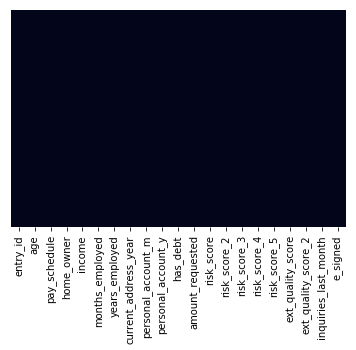

In [7]:
sns.heatmap(data.isnull(),yticklabels=False ,cbar = False)

In [8]:
df = data.drop(columns=['entry_id','pay_schedule','e_signed'])

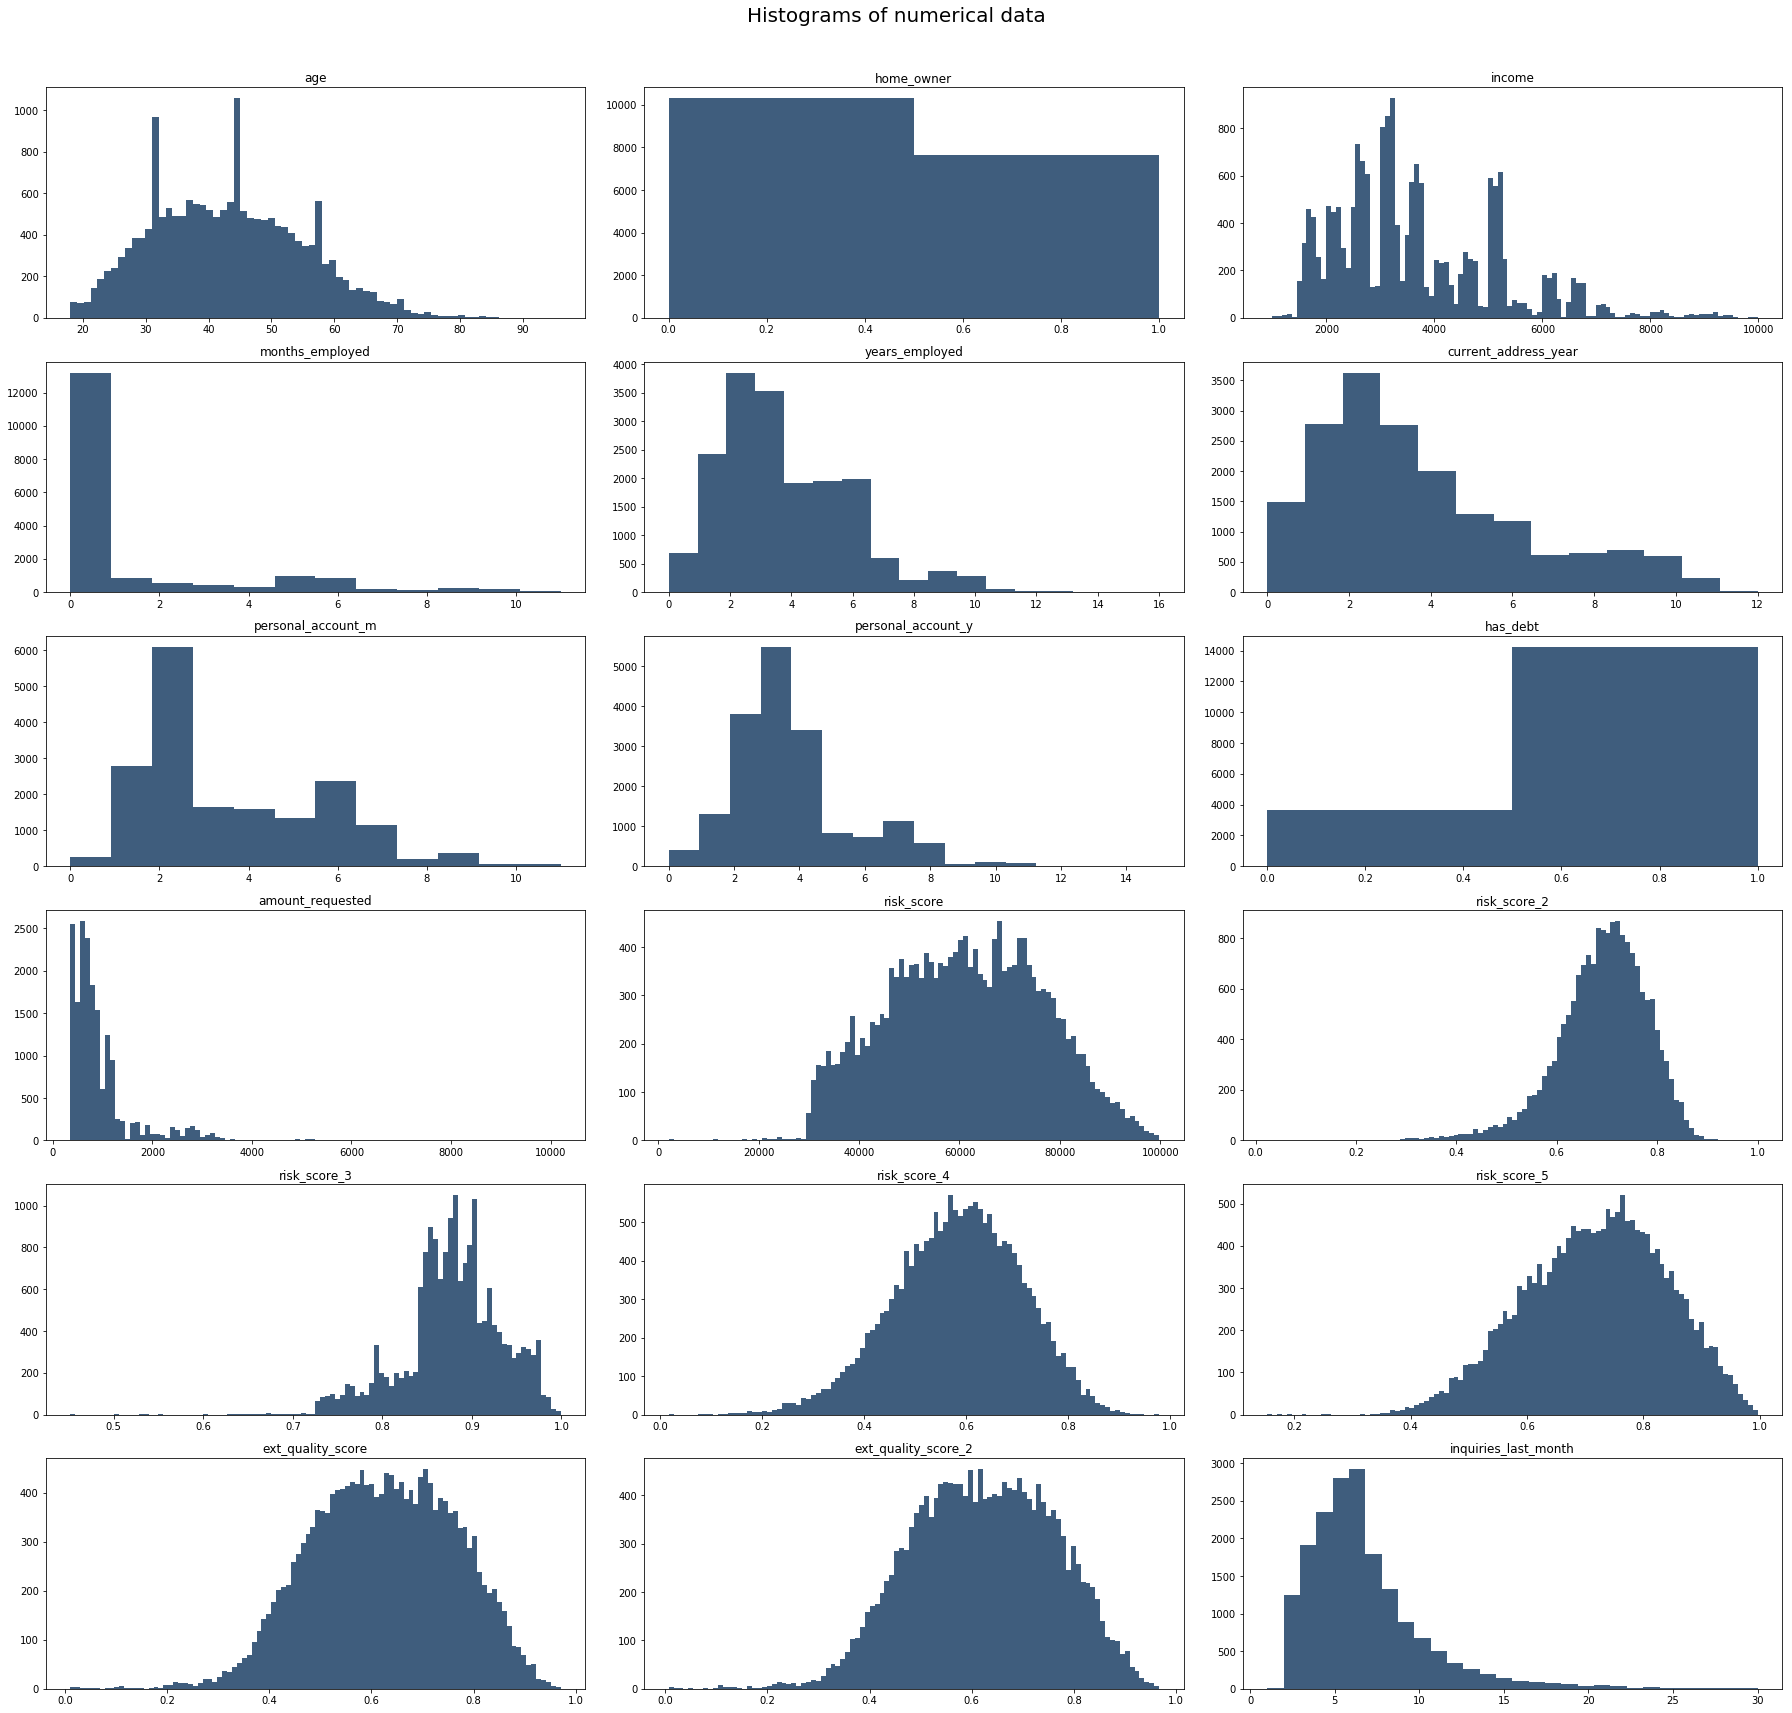

In [9]:
fig =plt.figure(figsize=(25,25))
plt.suptitle('Histograms of numerical data',fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])
    
    vals = np.size(df.iloc[:,i].unique())
    if vals >=100:
        vals =100
    plt.hist(df.iloc[:,i],bins=vals,color='#3F5D7D')
    
plt.tight_layout(rect = [0,0.03,1,0.95])    
    

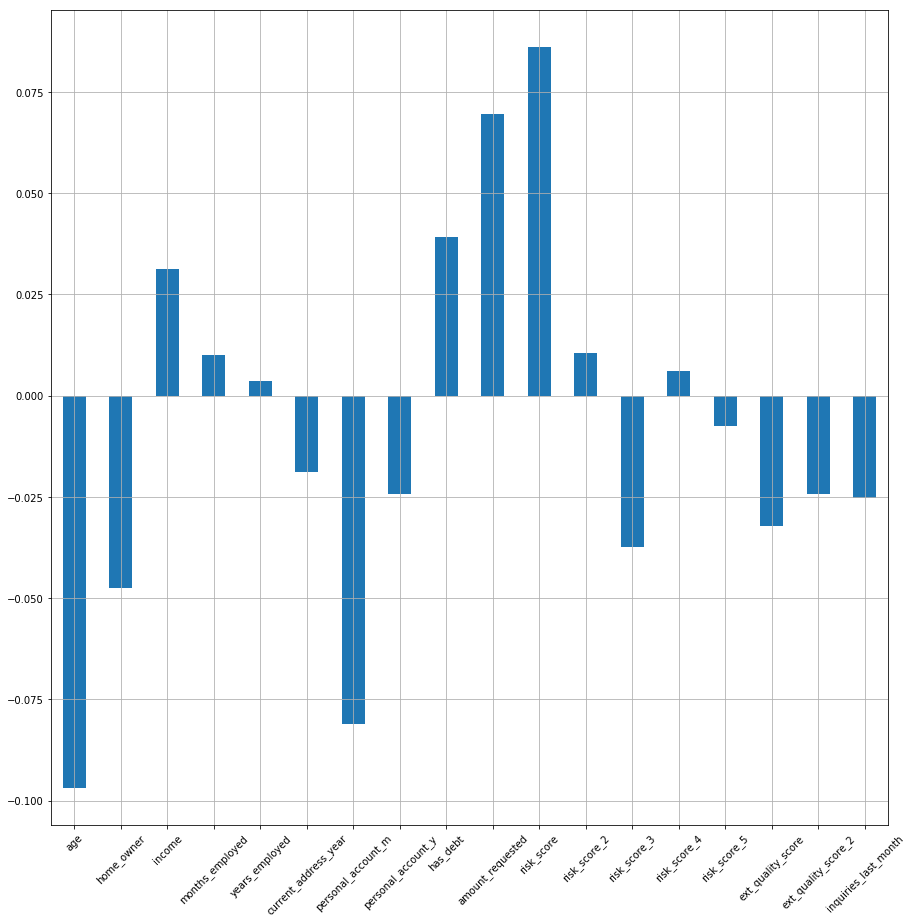

In [10]:
df.corrwith(data['e_signed']).plot.bar(grid=True,figsize=(15,15),rot =45 ,fontsize=10)

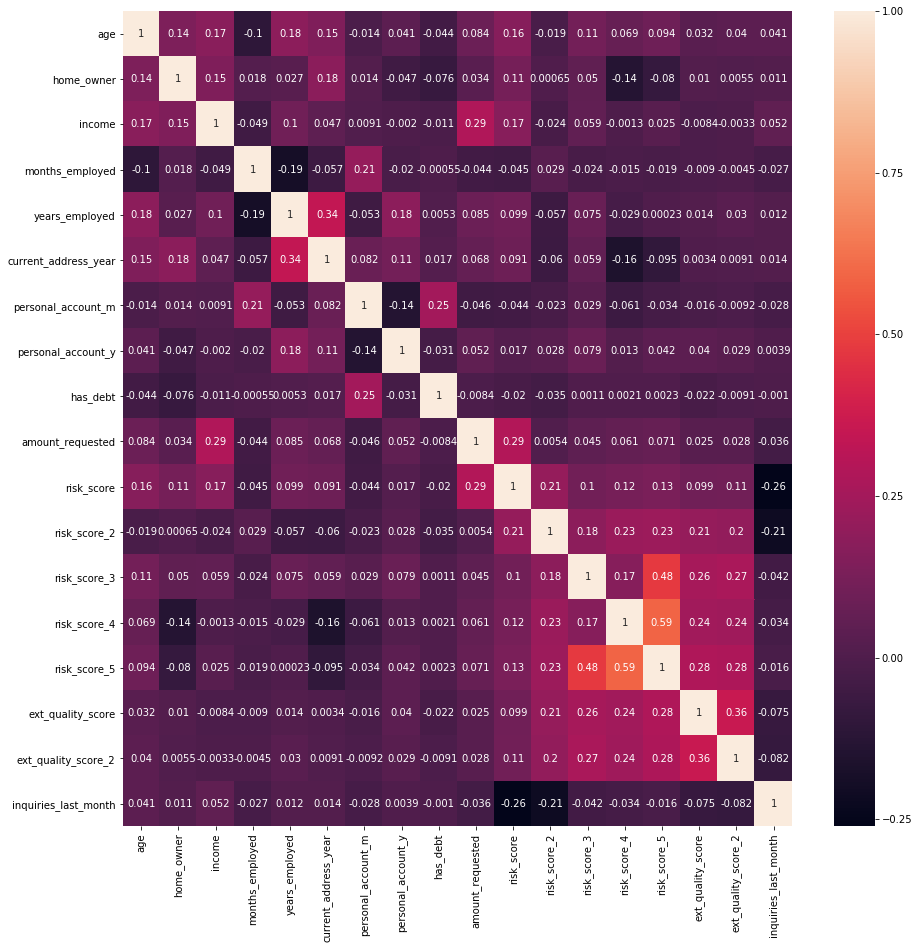

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [12]:
data.drop(columns=['months_employed'],axis=1,inplace=True)

In [13]:
data['personal_account_months'] = (data['personal_account_m'] + data['personal_account_y']*12)

In [14]:
data.drop(columns=['personal_account_m','personal_account_y'],axis=1,inplace=True)

In [15]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [16]:
data = pd.get_dummies(data)

In [17]:
data.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [18]:
data.drop(columns=['pay_schedule_semi-monthly'],axis=1,inplace=True)

In [19]:
user_id = data['entry_id']
response = data['e_signed']

In [20]:
data.drop(columns=['entry_id','e_signed'],axis=1 ,inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train ,y_test = train_test_split(data,response,test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
sc_train = sc.fit_transform(X_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
sc_test = sc.fit_transform(X_test)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
scaled_train = pd.DataFrame(sc_train,columns=X_train.columns)

In [28]:
scaled_test = pd.DataFrame(sc_test,columns=X_test.columns)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier = LogisticRegression(penalty='l1')

In [31]:
classifier.fit(scaled_train,y_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
pred = classifier.predict(scaled_test)

In [33]:
from sklearn.metrics import classification_report ,confusion_matrix

In [34]:
print(confusion_matrix(y_test,pred))

[[ 671  968]
 [ 532 1411]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.41      0.47      1639
           1       0.59      0.73      0.65      1943

   micro avg       0.58      0.58      0.58      3582
   macro avg       0.58      0.57      0.56      3582
weighted avg       0.58      0.58      0.57      3582



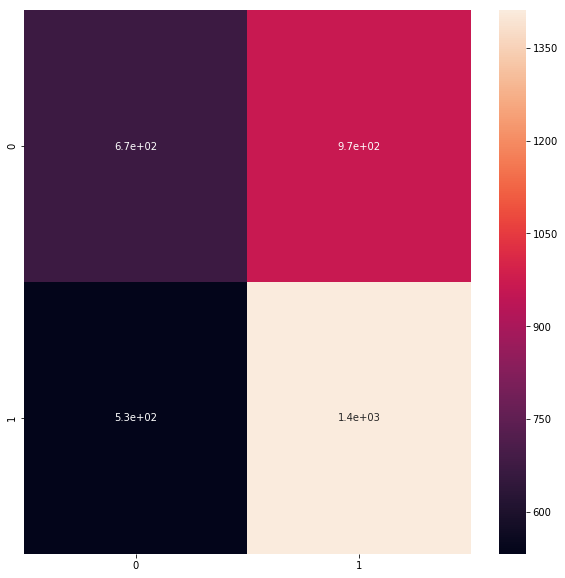

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [37]:
coefficient = pd.DataFrame(scaled_train.columns,columns=['Features'])

In [38]:
coefficient['Coefficient'] = np.transpose(classifier.coef_)

In [39]:
coefficient

,Features,Coefficient
0,age,-0.223508
1,home_owner,-0.099847
2,income,0.042724
3,years_employed,0.046870
4,current_address_year,-0.019889
5,has_debt,0.080254
6,amount_requested,0.102172
7,risk_score,0.196438
8,risk_score_2,0.004405
9,risk_score_3,-0.068273


In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
model.fit(scaled_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
pred = model.predict(scaled_test)

In [44]:
print(confusion_matrix(y_test,pred))


[[ 799  840]
 [ 540 1403]]


In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1639
           1       0.63      0.72      0.67      1943

   micro avg       0.61      0.61      0.61      3582
   macro avg       0.61      0.60      0.60      3582
weighted avg       0.61      0.61      0.61      3582



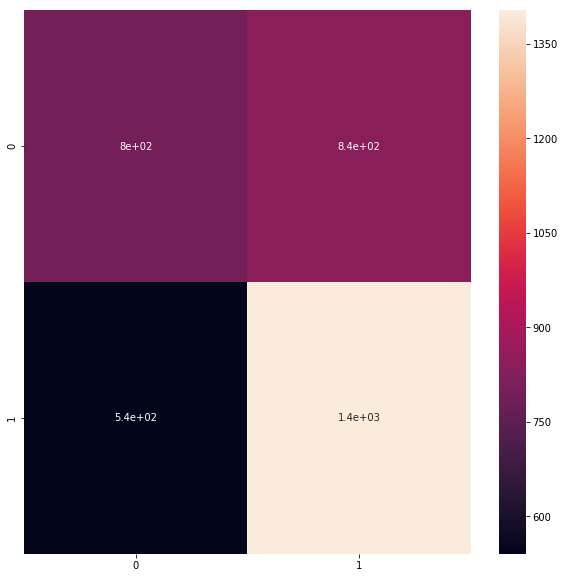

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param = {'C':[1,10,100,1000],'gamma':[1, 0.1,0.01,0.001]}

In [49]:
grid = GridSearchCV(SVC(),param_grid=param,verbose=3)

In [50]:
grid.fit(scaled_train,y_train)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.5399916247906198, total=   9.6s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV] ........... C=1, gamma=1, score=0.5398952879581151, total=   9.4s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.5s remaining:    0.0s


[CV] ........... C=1, gamma=1, score=0.5373821989528795, total=   9.4s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6005025125628141, total=   5.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.5987434554973822, total=   5.4s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.5985340314136126, total=   5.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5841708542713567, total=   5.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5966492146596859, total=   5.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5935078534031414, total=   5.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 13.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [51]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [53]:
grid.best_score_

0.6010749685885802

In [54]:
pred = grid.predict(scaled_test)

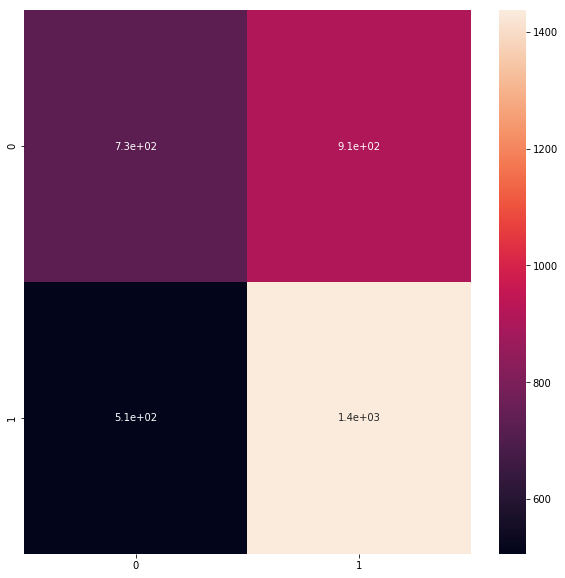

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      1639
           1       0.61      0.74      0.67      1943

   micro avg       0.61      0.61      0.61      3582
   macro avg       0.60      0.59      0.59      3582
weighted avg       0.60      0.61      0.60      3582



In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(n_estimators=200)

In [63]:
rfc.fit(scaled_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
pred = rfc.predict(scaled_test)

In [65]:
print(confusion_matrix(y_test,pred))

[[ 906  733]
 [ 601 1342]]


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1639
           1       0.65      0.69      0.67      1943

   micro avg       0.63      0.63      0.63      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.63      0.63      0.63      3582



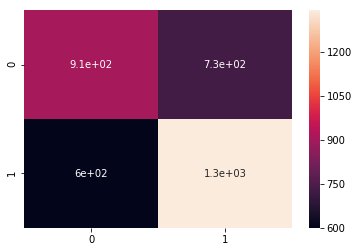

In [68]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [72]:
param_rfc= {'max_depth':[3,None],
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True,False],
           'criterion':['entropy']}

In [84]:
grid_rfc = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100),
                        param_grid=param_rfc,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

In [86]:
grid_rfc.fit(scaled_train,y_train)


In [87]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [88]:
grid_rfc.best_score_

0.6366745776909116

In [90]:
pred = grid_rfc.predict(scaled_test)

In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1639
           1       0.65      0.69      0.67      1943

   micro avg       0.63      0.63      0.63      3582
   macro avg       0.63      0.63      0.63      3582
weighted avg       0.63      0.63      0.63      3582



In [92]:
print(confusion_matrix(y_test,pred))

[[ 930  709]
 [ 605 1338]]


In [101]:
param_rfc= {'max_depth':[None],
           'max_features':[3,5,7],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[8,10,120],
           'bootstrap':[False],
           'criterion':['entropy']}

In [102]:
grid_rfc = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100),
                        param_grid=param_rfc,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

In [103]:
grid_rfc.fit(scaled_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None], 'max_features': [3, 5, 7], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [8, 10, 120], 'bootstrap': [False], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [104]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [105]:
grid_rfc.best_score_

0.6365349713807064

In [109]:
param_rfc= {'max_depth':[3,None],
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True,False],
           'criterion':['gini']}

In [110]:
grid_rfc = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100),
                        param_grid=param_rfc,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

In [111]:
grid_rfc.fit(scaled_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'bootstrap': [True, False], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [112]:
pred = grid_rfc.predict(scaled_test)

In [113]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [114]:
grid_rfc.best_score_

0.6368141840011169

In [115]:
print(confusion_matrix(y_test,pred))

[[ 920  719]
 [ 582 1361]]


In [116]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1639
           1       0.65      0.70      0.68      1943

   micro avg       0.64      0.64      0.64      3582
   macro avg       0.63      0.63      0.63      3582
weighted avg       0.64      0.64      0.64      3582



In [119]:
final_results = pd.concat([user_id,y_test],axis=1).dropna()

In [121]:
final_results['Prediction']  = pred

In [124]:
final_results.reset_index(inplace=True)

In [125]:
final_results

,index,entry_id,e_signed,Prediction
0,6,7948313,1.0,1
1,11,3818616,1.0,1
2,14,6235249,1.0,0
3,17,7611317,1.0,1
4,25,1519375,1.0,0
5,32,6398494,0.0,1
6,33,7048193,1.0,1
7,34,3769730,1.0,1
8,43,4797409,1.0,0
9,49,5490466,1.0,0
